In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
#Here is the Python code for constructing a boosted decision tree model with a 4D input and a 1D output (using y1 for the regression task). 
# The data is split into training, validation, and testing sets in a 60%, 20%, and 20% ratio, respectively. 
# The x1 feature and the target variable y1 are transformed using the provided functions.

In [24]:
df = pd.read_csv('dataset.csv')

# Define the transformation functions
def x_scale(x, p=7.5):
    return 1/p * np.log(1 + x * (np.exp(p) - 1))


#def y_scale(y):
 #   return np.log(1 + y) if y >= 0 else -np.log(1 - y)

def y_scale(y):
    return np.where(y >= 0, np.log(1 + y), -np.log(1 - y))



In [11]:
# Apply transformations
df['x1'] = x_scale(df['x1'])
#df['y1'] = df['y1'].apply(y_scale)
df['y1'] = y_scale(df['y1'])

# Splitting the data into input features and target variable
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y1']  # I am are choosing y1 for the regression task

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
# Splitting the data into training, validation, and testing sets (60%, 20%, 20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [19]:
# Setting up the model with initial hyperparameters
model = GradientBoostingRegressor(
    n_estimators=150,  # number of boosting stages to be run
    max_depth= 4,  # maximum depth of each tree
    min_samples_split=2,  # minimum samples required to split an internal node
    min_samples_leaf=1  # minimum samples required to be at a leaf node
)

# Training the model
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=150)

In [20]:

print("Test set accuracy: {:.2f}".format(model.score(X_test,y_test)))

Test set accuracy: 0.99


In [19]:
# Evaluating the model on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")


# Evaluating the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Validation MSE: 0.09716177768944928
Test MSE: 0.09760630298478454


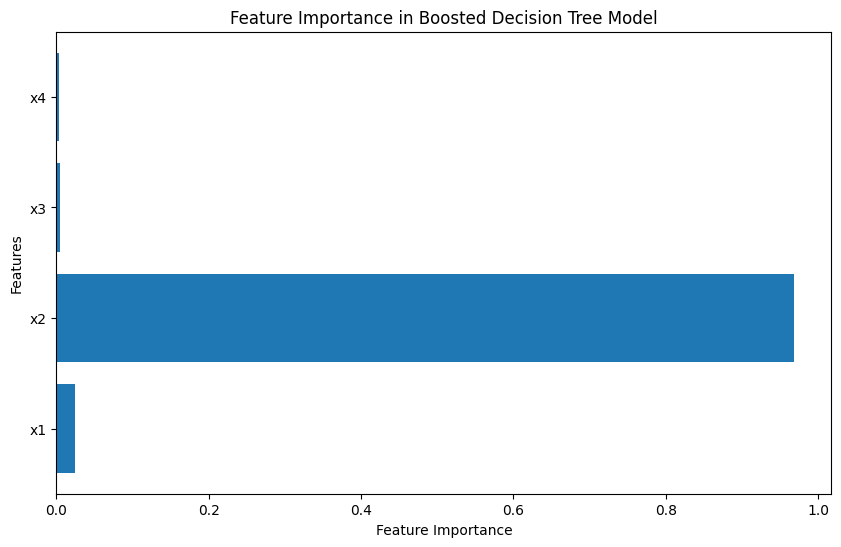

In [20]:
# Plotting the feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Boosted Decision Tree Model')
plt.show()

In [25]:
print('end for now')

end for now
